In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### rcParams and style
notice that it can be update by style
https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample

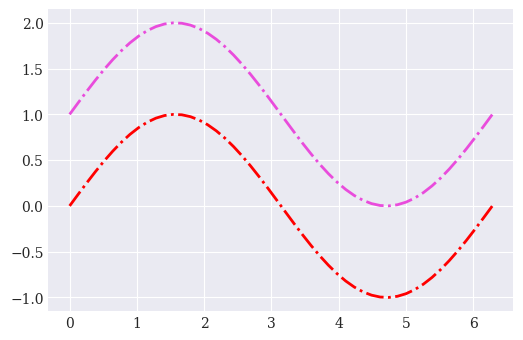

In [2]:
# matplotlib style
# use 'with' to avoid have further influence

with plt.style.context('seaborn-darkgrid'):
    mpl.rcParams['lines.linewidth'] = 2
    # mpl.rcParams['lines.color'] ='r' not work
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "#e94cdc", "0.7"]) 
    mpl.rcParams['lines.linestyle'] = '-.'
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Times New Roman']
    fig = plt.figure(dpi=100)
    ax = plt.gca()
    x = np.linspace(0, 2 * np.pi)
    y = np.sin(x)
    ax.plot(x, y)
    ax.plot(x, y+1)
    ax.set_xticks(np.arange(7))
    ax.set_yticks(np.arange(-1,2.5,0.5))
plt.show()
plt.close()

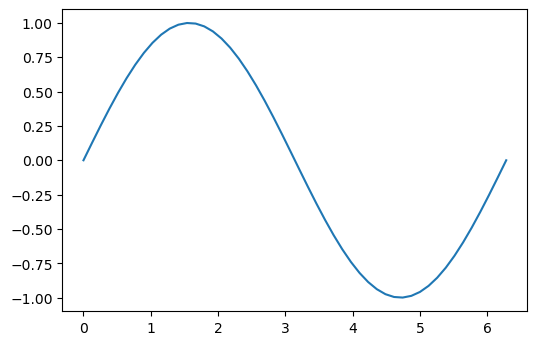

In [3]:
# using with, all params are recovered.
# mpl.rcParams.update(mpl.rcParamsDefault)
fig = plt.figure(dpi=100)
ax = plt.gca()
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
ax.plot(x, y)
plt.show()
plt.close()

#### sns template
https://seaborn.pydata.org/examples/index.html

#### lineplot with errorband

<AxesSubplot:xlabel='x', ylabel='y'>

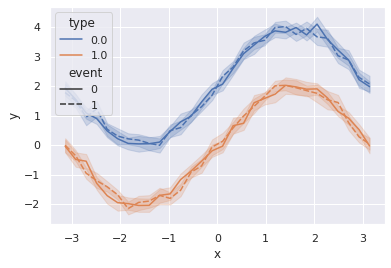

In [4]:
sns.set_theme(style="darkgrid")
N = 30
rep = 50
for i in np.arange(20):
    x1 = np.tile(np.linspace(-np.pi, np.pi, N), rep)

    y1 = 2*np.sin(x1) + 0.6*np.random.randn(rep*N)
    y2 = 2*np.sin(x1) + 2 + 0.6*np.random.randn(rep*N)


data = pd.DataFrame(np.vstack((np.hstack((x1, x1)), 
                               np.hstack((y1, y2)))).T, 
                    columns = ['x', 'y'])

data['type'] = np.hstack((np.zeros(rep*N) + 1, np.zeros(rep*N)))
data['event'] = np.random.randint(2,size=2*rep*N)

sns.lineplot(x="x", y="y",
             hue="type", 
             style="event",
             data=data)

#### marginal distribution

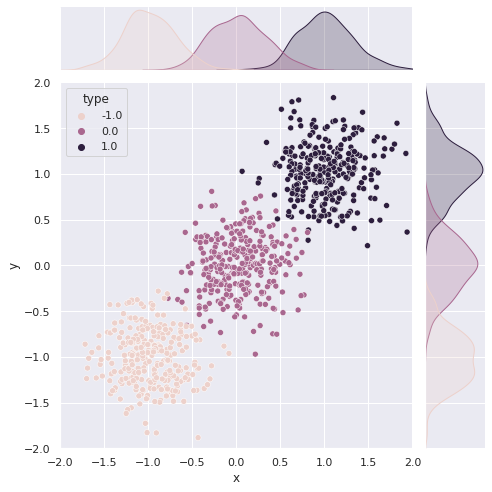

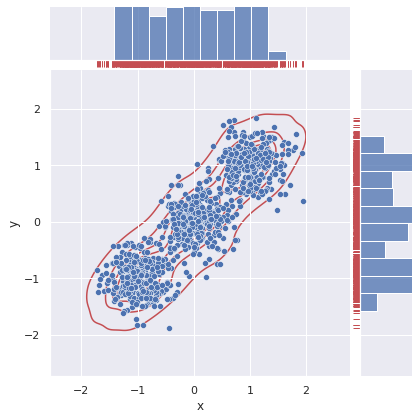

In [5]:
sns.set_theme(style="darkgrid")
N = 300

# not valid
# dt = np.dtype([('x', '>f16'), ('y', '>f16')])
# data = np.zeros(N, dtype=dt)
# data['x'] = np.random.randn(N)
# data['y'] = np.random.randn(N)

# pandas

x1 = 0.3*np.random.randn(N) + 1
y1 = 0.3*np.random.randn(N) + 1
x2 = 0.3*np.random.randn(N)
y2 = 0.3*np.random.randn(N)
x3 = 0.3*np.random.randn(N) - 1
y3 = 0.3*np.random.randn(N) - 1

data = pd.DataFrame(np.vstack((np.hstack((x1,x2,x3)), 
                               np.hstack((y1,y2,y3)))).T, 
                    columns = ['x', 'y'])
data['type'] = np.hstack((np.zeros(N)+1, np.zeros(N), np.zeros(N)-1))
g = sns.jointplot(x='x', y='y', data=data,
                  hue = 'type', 
                  #truncate=False,
                  xlim=(-2, 2), 
                  ylim=(-2, 2),
                  color="m", height=7)

plt.show()
plt.close()
## add more
g = sns.jointplot(data=data, x="x", y="y")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt.show()
plt.close()
sns.reset_orig()

#### Histogram

<AxesSubplot:xlabel='Count', ylabel='x'>

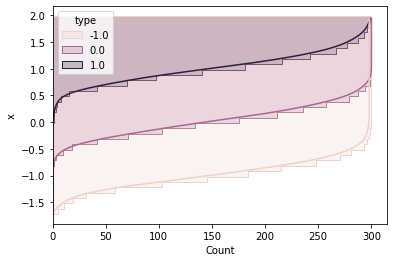

In [6]:
sns.histplot(data=data, y='x', hue='type', kde=True, bins=30, 
             binwidth=0.1,
             cumulative=True,
            element='step')

#### heatmap with annotation

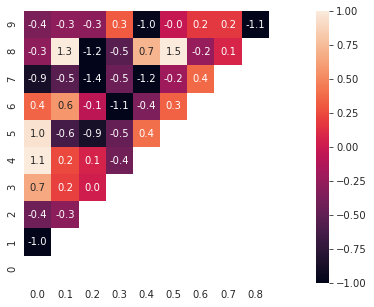

In [7]:
corr = 10*np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, 
                     xticklabels = list(np.arange(9)/10),
                     annot=True, fmt=".1f",
                     mask=mask, 
                     vmax=1,
                     vmin=-1,
                     square=True)
    ax.invert_yaxis()
plt.show()
plt.close()

#### pgf saving

In [8]:
# import matplotlib as mpl
# mpl.use("pgf")
# import matplotlib.pyplot as plt
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "font.serif" : "Times New Roman", 
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False,    # don't setup fonts from rc parameters
#     "pgf.preamble": "\n".join([
#          r"\usepackage{url}",            # load additional packages
#          r"\usepackage{unicode-math}",   # unicode math setup
#          r"\setmainfont{DejaVu Serif}",  # serif font via preamble
#     ])
# })

# fig, ax = plt.subplots(figsize=(4.5, 2.5))

# ax.plot(range(5))

# ax.set_xlabel("unicode text: я, ψ, €, ü")
# ax.set_ylabel(r"\url{https://matplotlib.org}")
# ax.legend(["unicode math: $λ=∑_i^∞ μ_i^2$"])

# fig.tight_layout(pad=.5)

# fig.savefig("pgf_preamble.pdf")
# fig.savefig("pgf_preamble.pgf")

#### pdf saving

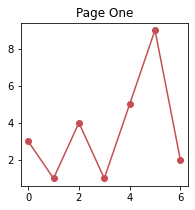

In [9]:
import datetime
from matplotlib.backends.backend_pdf import PdfPages
# https://matplotlib.org/stable/gallery/misc/multipage_pdf.html
with PdfPages('multipage_pdf.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.show()
    plt.close()
    
    d = pdf.infodict()
    d['Title'] = 'Multipage PDF Example'
    d['Author'] = 'Jouni K. Sepp\xe4nen'
    d['Subject'] = 'How to create a multipage pdf file and set its metadata'
    d['Keywords'] = 'PdfPages multipage keywords author title subject'
    d['CreationDate'] = datetime.datetime(2009, 11, 13)
    d['ModDate'] = datetime.datetime.today()